# Random Forest with Hyperparameter Tuning vs SGD

O dataset "Forest Cover type" é um famoso dataset com cerca de meio milhão de amostras, nas quais o objetivo é prever o tipo de árvores existentes em vários terrenos. Cada linha do dataset corresponde a um pequeno terreno, onde são listadas várias características geológicas e geográficas.

Neste notebook, filtrei o dataset para selecionar aleatoriamente 20000 linhas, e mantive apenas as amostras dos territórios 1 e 3 do dataset. Eis a descrição das colunas:

| #  | Coluna                             | Significado |
|--- | ------                             | ----------- |
| 0  | Elevation                          | Elevação do terreno (m) |
| 1  | Aspect                             | Azimute do terreno (graus) |
| 2  | Slope                              | Inclinação do terreno (graus) |
| 3  | Horizontal_Distance_To_Hydrology   | Distância horizontal até a característica hidrológica (lagos, rios, etc) mais próxima (m) |
| 4  | Vertical_Distance_To_Hydrology     | Distância vertical até a característica hidrológica (lagos, rios, etc) mais próxima (m) |
| 5  | Horizontal_Distance_To_Roadways    | Distância horizontal até rodovia mais próxima (m) |
| 6  | Hillshade_9am                      | Indice de sombra de encosta às 9h no solstício de verão |
| 7  | Hillshade_Noon                     | Indice de sombra de encosta ao meio-dia no solstício de verão |
| 8  | Hillshade_3pm                      | Indice de sombra de encosta às 15h no solstício de verão |
| 9  | Horizontal_Distance_To_Fire_Points | Distância horizontal até o ponto de queimada mais próximo (m) |
| 10 | Cover_Type                         | Tipo de arvores (variável categórica) (esse é o nosso target) |
| 11 | soil_type                          | Tipo de solo (variável categórica) |
| 12 | Wilderness                         | Região de coleta dos dados (variável categórica) |

O arquivo "covtype_info.txt" contém mais informação sobre esse dataset, incluindo as definições exatas de tipo de solo, região de coleta de dados, e tipo de árvores.

O tipo 2 de cobertura corresponde às árvores do tipo "spruce/fir". O objetivo é construir um classificador que detecta se um terreno será coberto por esse tipo de árvore ou não. Utilizando recursos de Hyperparameter Tuning. Importante lembrar que esse notebook foi codado para uma prova então os resultados de acurácia não foram tão altos o que demandaria mais tempo para aprimorar o modelo. Foi um teste de velocidade para construir modelos de ML.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv')
df['Cover_Type'] = df['Cover_Type'].astype('category')
df['soil_type'] = df['soil_type'].astype('category')
df['Wilderness'] = df['Wilderness'].astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
Elevation                             20000 non-null int64
Aspect                                20000 non-null int64
Slope                                 20000 non-null int64
Horizontal_Distance_To_Hydrology      20000 non-null int64
Vertical_Distance_To_Hydrology        20000 non-null int64
Horizontal_Distance_To_Roadways       20000 non-null int64
Hillshade_9am                         20000 non-null int64
Hillshade_Noon                        20000 non-null int64
Hillshade_3pm                         20000 non-null int64
Horizontal_Distance_To_Fire_Points    20000 non-null int64
Cover_Type                            20000 non-null category
soil_type                             20000 non-null category
Wilderness                            20000 non-null category
dtypes: category(3), int64(10)
memory usage: 1.6 MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Elevation,20000.0,2990.01095,222.092373,2286.0,2845.0,3001.0,3155.0,3846.0
Aspect,20000.0,150.38660,110.280571,0.0,55.0,120.0,246.0,360.0
Slope,20000.0,13.57140,7.048431,0.0,8.0,13.0,18.0,50.0
Horizontal_Distance_To_Hydrology,20000.0,274.02080,217.941151,0.0,108.0,228.0,391.0,1371.0
Vertical_Distance_To_Hydrology,20000.0,45.68340,58.822985,-153.0,6.0,28.0,67.0,595.0
Horizontal_Distance_To_Roadways,20000.0,2540.88885,1545.080692,0.0,1308.0,2250.0,3548.0,7063.0
Hillshade_9am,20000.0,213.88320,24.622174,79.0,201.0,219.0,232.0,254.0
Hillshade_Noon,20000.0,224.01065,18.740213,95.0,213.0,226.0,237.0,254.0
Hillshade_3pm,20000.0,141.66810,36.566896,0.0,119.0,142.0,166.0,251.0
Horizontal_Distance_To_Fire_Points,20000.0,2066.96250,1330.040270,0.0,1131.0,1809.0,2609.0,7089.0


In [6]:
df['Cover_Type'].value_counts()

2    10400
1     7618
7      710
3      583
5      370
6      319
Name: Cover_Type, dtype: int64

In [7]:
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,Wilderness
0,2826,330,14,60,10,1549,187,222,175,2563,2,20,3
1,3283,27,3,0,0,4401,218,232,151,3653,1,23,3
2,2923,60,12,268,63,3555,229,215,118,5196,2,29,1
3,3018,57,8,277,47,4391,226,223,132,900,1,19,1
4,2664,112,5,60,-8,1214,229,234,139,1719,5,20,3
5,2890,151,15,234,85,2604,238,239,126,1291,2,10,3
6,3411,200,19,437,76,2882,209,253,171,1613,1,32,3
7,3321,72,21,67,9,2282,238,196,79,2151,1,22,3
8,3033,241,19,384,67,1276,181,252,206,577,2,32,3
9,2710,102,19,255,78,2486,248,212,86,2259,3,10,3


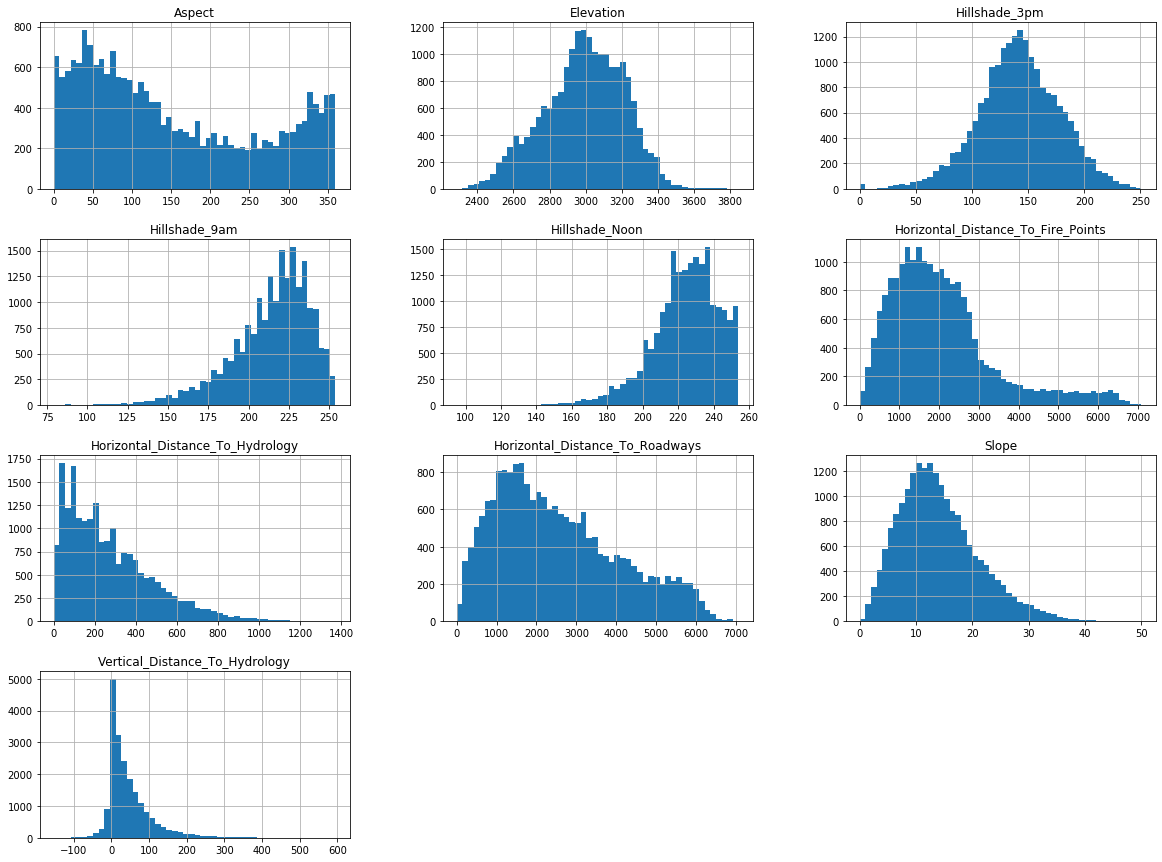

In [8]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

target = 'Cover_Type'

X = df.drop(columns=[target])

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#pega apenas os valores 2 do y 
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [11]:
from sklearn.linear_model import SGDClassifier
#roda o modelo SGD para os dados
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-4)  
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_score
#testa a validação cruzada dentro da base de teste para chegar a cara do modelo até agor
res = cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy", n_jobs=-1)
#O cross val score mostra uma estimativa do desempenho para a base de testes de forma menos enviesada.
print(res)

[0.62654668 0.52897056 0.52109507]


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3, n_jobs=-1)
#matriz de confusao mostra falsos positivos, falsos negativos e positivos e negativos reais.
mat = confusion_matrix(y_train_2, y_train_pred)
mat

array([[5310, 2370],
       [4057, 4263]], dtype=int64)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Demora para rodar com o randomized search
#forest_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100,min_samples_split=10, min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_2, cv=3, method="predict_proba", n_jobs=-1)

y_scores_forest = y_probas_forest[:, 1] 
y_scores_forest

array([0.05033333, 0.77220352, 0.40559079, ..., 0.93861067, 0.82356352,
       0.86679269])

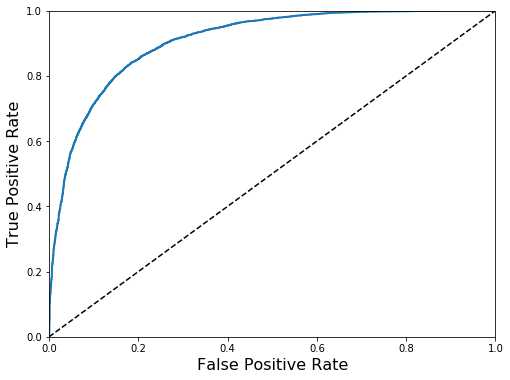

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_2, y_scores_forest)
#tudo para o treino para testar depois a acuracia do real
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
forest_clf.fit(X_train, y_train_2) 
final_predict = forest_clf.predict(X_test)
print(accuracy_score(y_test_2, final_predict))

0.83625


In [17]:
sgd_clf.fit(X_train, y_train_2) 
final_predict = sgd_clf.predict(X_test)
print(accuracy_score(y_test_2, final_predict))

0.60225


**Conclusões finais**  

O modelo apesar de ser simples se mostra funcional primeiro foi utilizada a validação cruzada para chegar o desempenho dentro da base de testes e foi observado um desempenho mais ou menos para o SGD e ok para o random forrest. A curva roc mostra um pouco da cara do desempenho e o teste real na base mostra para o sgd e random forrest acurácia de 60% e 83% respectivamente.